<a href="https://colab.research.google.com/github/MerveKaragulTabas/DL--Deep-Learning/blob/main/DL_S5_(CNN_MNIST_DATA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CNN with MNIST Data**

In [ ]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# Release GPU memory to prevent memory-leaks.

from numba import cuda
device = cuda.get_current_device()
device.reset()

In [ ]:
!nvidia-smi

Thu Mar 10 19:09:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    58W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [ ]:
# Checking the shape of one image
X_train[8].shape

(28, 28)

In [ ]:
X_train[8]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
         63, 197,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
X_train[8].shape

(28, 28)

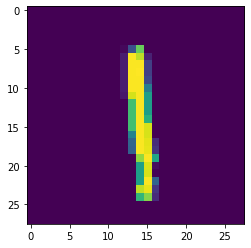

In [ ]:
plt.imshow(X_train[8])
# plt.matshow(X_train[5])

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

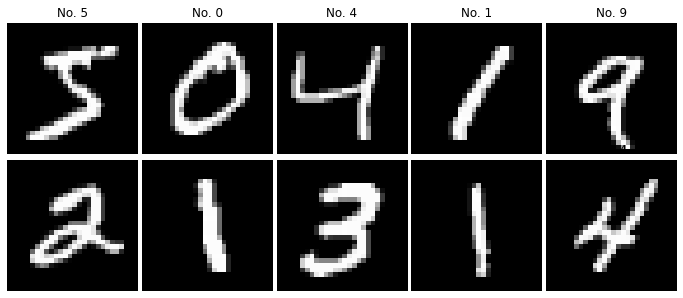

In [ ]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

## Data Preprocessing

In [ ]:
X_train[9].min()

0

In [ ]:
X_train[9].max()

255

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
X_train[9].min()

0.0

In [ ]:
X_train[9].max()

1.0

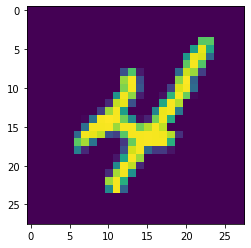

In [ ]:
plt.imshow(X_train[9])

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**A sample example showing the conversion of 3D data to 2D**
![3Dto2D](https://dphi-courses.s3.ap-south-1.amazonaws.com/Deep+Learning+Bootcamp/3D+to++2D.png)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 19s 5ms/step - loss: 0.1603 - accuracy: 0.9517 - val_loss: 0.0653 - val_accuracy: 0.9780
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0520 - accuracy: 0.9839 - val_loss: 0.0442 - val_accuracy: 0.9839
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0329 - accuracy: 0.9896 - val_loss: 0.0451 - val_accuracy: 0.9851
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0427 - val_accuracy: 0.9852
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0151 - accuracy: 0.9953 - val_loss: 0.0508 - val_accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0099 - accuracy: 0.9963 - val_loss: 0.0499 - val_accuracy: 0.9842


In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.history.history

{'accuracy': [0.95169997215271,
  0.9838666915893555,
  0.9896166920661926,
  0.993066668510437,
  0.9953166842460632,
  0.9962833523750305],
 'loss': [0.16034215688705444,
  0.05203970521688461,
  0.032918818295001984,
  0.021377913653850555,
  0.015071953646838665,
  0.00991045217961073],
 'val_accuracy': [0.9779999852180481,
  0.9839000105857849,
  0.9850999712944031,
  0.9851999878883362,
  0.9847000241279602,
  0.9842000007629395],
 'val_loss': [0.06528468430042267,
  0.04418545961380005,
  0.045055877417325974,
  0.04273545369505882,
  0.050751734524965286,
  0.049879152327775955]}

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.160342,0.951700,0.065285,0.9780
1,0.052040,0.983867,0.044185,0.9839
2,0.032919,0.989617,0.045056,0.9851
3,0.021378,0.993067,0.042735,0.9852
4,0.015072,0.995317,0.050752,0.9847


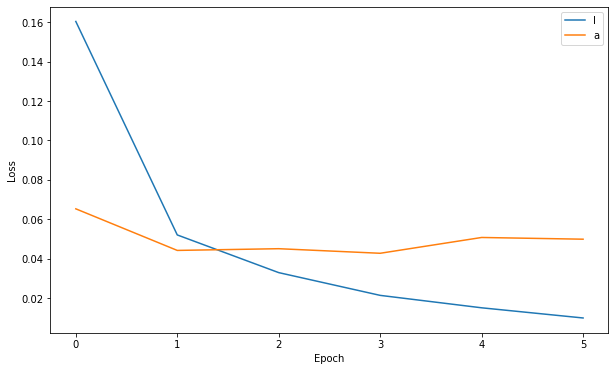

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels')

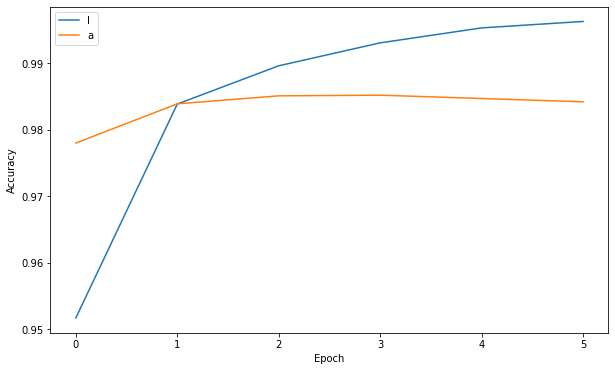

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

In [ ]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 1s 4ms/step - loss: 0.0499 - accuracy: 0.9842
[0.049879152327775955, 0.9842000007629395]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
preds = model.predict(X_test)
preds

array([[6.23766483e-10, 2.47666492e-07, 3.34198305e-08, ...,
        9.99985456e-01, 1.63864189e-09, 3.93548191e-07],
       [2.42637660e-10, 1.41132883e-08, 1.00000000e+00, ...,
        4.97321910e-14, 2.10627371e-12, 9.84775846e-13],
       [4.33129665e-09, 9.99993920e-01, 5.95204108e-09, ...,
        3.23797190e-06, 6.04637194e-07, 4.16202317e-09],
       ...,
       [9.99606676e-17, 5.85819967e-13, 2.47110745e-16, ...,
        2.76208689e-13, 1.18268217e-09, 5.29813970e-09],
       [2.36118655e-12, 3.16758187e-12, 1.07884846e-16, ...,
        4.50155863e-13, 1.76957019e-05, 2.19896302e-12],
       [5.37528189e-10, 2.39145986e-12, 4.00083799e-10, ...,
        4.37618657e-14, 2.29195241e-09, 1.15696897e-11]], dtype=float32)

In [ ]:
preds[0]

array([6.23766483e-10, 2.47666492e-07, 3.34198305e-08, 1.39232588e-05,
       4.36903917e-08, 1.18909205e-11, 1.86283362e-13, 9.99985456e-01,
       1.63864189e-09, 3.93548191e-07], dtype=float32)

In [ ]:
predictions= np.argmax(preds, axis=1)

In [ ]:
len(predictions)

10000

In [ ]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
print(confusion_matrix(y_test, predictions))

[[ 976    0    0    1    0    1    2    0    0    0]
 [   0 1130    0    2    0    1    2    0    0    0]
 [   4    3 1006    7    1    0    0    6    4    1]
 [   0    0    0 1000    0    6    0    1    2    1]
 [   1    0    1    0  968    0    3    0    1    8]
 [   1    0    1    7    0  878    4    0    1    0]
 [   8    2    0    1    3    2  942    0    0    0]
 [   0    3    7    4    0    0    0 1002    1   11]
 [   4    0    3    3    0    4    3    4  944    9]
 [   1    0    0    2    5    3    0    1    1  996]]


In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.049879152327775955
Test accuracy: 0.9842000007629395


In [ ]:
my_number = X_test[5]

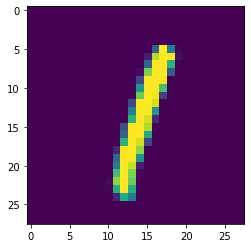

In [ ]:
plt.imshow(my_number.reshape(28,28));

In [ ]:
model.predict(my_number.reshape(1,28,28,1))

array([[6.1723165e-10, 9.9993086e-01, 4.4072618e-10, 9.2593266e-11,
        3.9477089e-07, 8.9638286e-10, 5.1779234e-09, 6.8602436e-05,
        6.1926762e-08, 7.1108310e-09]], dtype=float32)

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([1])

In [ ]:
model.save("cnn-1.h5")